In [1]:
import torch
from matplotlib import pyplot as plt

def Convert(tup, di):
    di = dict(tup)
    return di

def countFreq(arr, n):
    mp = dict()

    # Traverse through array elements
    # and count frequencies

    for i in range(n):
        if arr[i] in mp.keys():
            mp[arr[i]] += 1
        else:
            mp[arr[i]] = 1

    # Traverse through map and print
    # frequencies

    return mp

In [2]:
import os
from vqa_dataset import VQADataset
os.environ["TOKENIZERS_PARALLELISM"] = "false"
data_path = './data/'  # change this to your data path
anno_file = data_path + 'mscoco_train2014_annotations.json'
q_file = data_path + 'OpenEnded_mscoco_train2014_questions.json'
image_dir = "/ocean/projects/asc170022p/shg121/PhD/CMU-Visual-Learning-Recognition/Hw3-vqa-main/data/train2014"
image_filename_pattern = "COCO_train2014_{}.jpg"
vqa_ds = VQADataset(
        image_dir=image_dir,
        question_json_file_path=q_file,
        annotation_json_file_path=anno_file,
        image_filename_pattern=image_filename_pattern
    )

loading VQA annotations and questions into memory...
creating index...
index created!


In [3]:
def plot_hist(out, title):
    print(out.size())
    out = out.tolist()
    mp = countFreq(out, len(out))
    mp_sorted = sorted(mp.items(), key=lambda x: x[1], reverse=True)
    # print(mp_sorted)

    mp_sorted_dict = {}
    mp_sorted_dict = Convert(mp_sorted, mp_sorted_dict)
    answer_to_id_map = vqa_ds.answer_to_id_map
    answer_to_id_map['other'] = 5216
#     print(mp_sorted_dict)
    keys = list(mp_sorted_dict.keys())
    keys = [int(keys) for keys in keys]
    values = list(mp_sorted_dict.values())
    ans_keys = list(answer_to_id_map.keys())
    ans_vals = list(answer_to_id_map.values())
    ans_txt = []
    for key in keys:
        ans_txt.append(ans_keys[ans_vals.index(key)])

    # fig = plt.figure(figsize = (10, 10))
    fig, ax = plt.subplots(figsize=(10, 5))
    # creating the bar plot
    
    ax.bar(ans_txt, list(mp_sorted_dict.values()), width=5)
    ax.set_ylim([0, 1000])
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) 
    # plt.xlabel("Courses offered")
    # plt.ylabel("No. of students enrolled")
    plt.title("Transformer model")
    plt.show()

    print(ans_txt[0:10])
    list(mp_sorted_dict.values())[0:10]

torch.Size([121512])


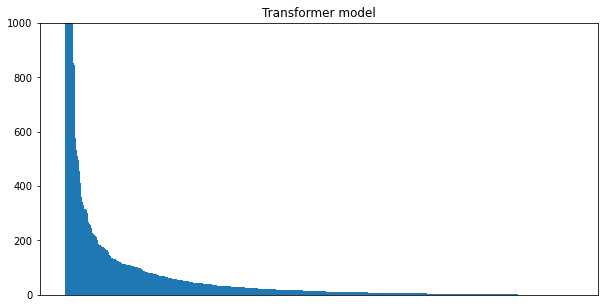

['yes', 'no', 'other', '2', 'white', 'red', 'blue', '4', 'black', 'yellow']


In [4]:
out = torch.load('output.pt')
plot_hist(out, "Transformer model")

torch.Size([121512])
torch.Size([121512])


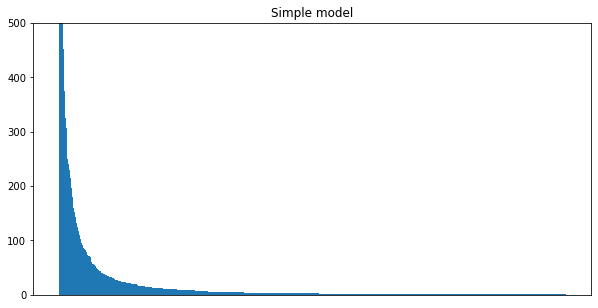

['yes', 'no', '2', 'white', 'other', 'red', 'blue', '1', '3', 'green']


In [141]:
gt = torch.load('gt.pt')
out = gt.argmax(dim=1)
# print(out.size())
plot_hist(out, "Transformer model")